In [2]:
import pandas as pd
data = pd.read_csv('processed_data.csv')

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
# Define features and target
features = ['Facility Age', 'Fencing Available Numeric', 'Lighting Available Numeric']
target = 'Facility Condition Numeric'

# Drop rows with missing values
data_cleaned = data.dropna(subset=features + [target])

X = data_cleaned[features]
y = data_cleaned[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (5391, 3), Test set shape: (1348, 3)


In [8]:
# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

In [10]:
# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.20      0.04      0.06        28
         2.0       0.00      0.00      0.00        27
         3.0       0.47      0.05      0.10       165
         4.0       0.84      0.99      0.91      1125

    accuracy                           0.83      1348
   macro avg       0.30      0.22      0.21      1348
weighted avg       0.76      0.83      0.77      1348

Accuracy Score: 0.8338278931750742


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


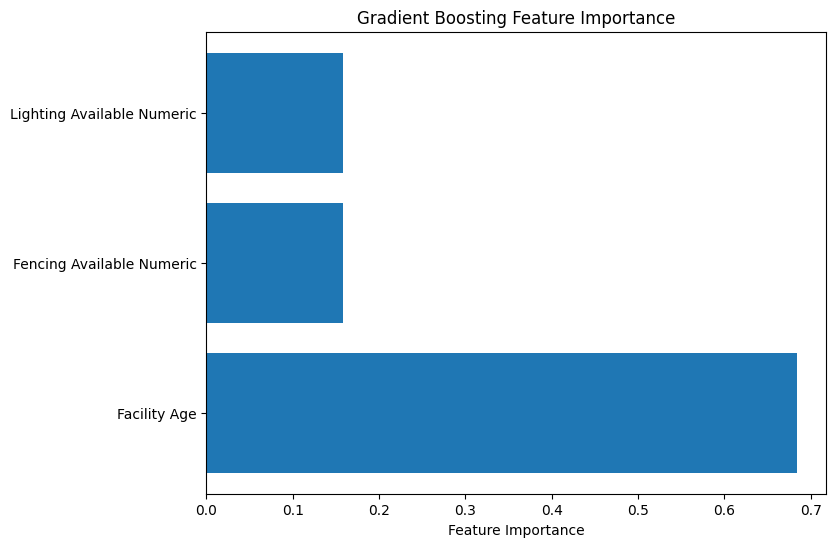

In [12]:
# Display feature importance
import matplotlib.pyplot as plt
import numpy as np

feature_importance = gb_classifier.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(np.arange(len(features)), feature_importance, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()